In [47]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

In [48]:
# loading dataset
df=pd.read_csv('D:/survey lung cancer1.csv',index_col=0)
df.head(20)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Level
GENDER,,,,,,,,,,,,,,,
1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0


In [49]:
df.Level

GENDER
1    1
1    1
0    0
1    0
0    0
    ..
0    1
1    1
1    1
1    1
1    1
Name: Level, Length: 309, dtype: int64

In [50]:
df.shape

(309, 15)

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>,
        <AxesSubplot:title={'center':'ANXIETY'}>],
       [<AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE '}>,
        <AxesSubplot:title={'center':'ALLERGY '}>],
       [<AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>,
        <AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>],
       [<AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>,
        <AxesSubplot:title={'center':'Level'}>, <AxesSubplot:>]],
      dtype=object)

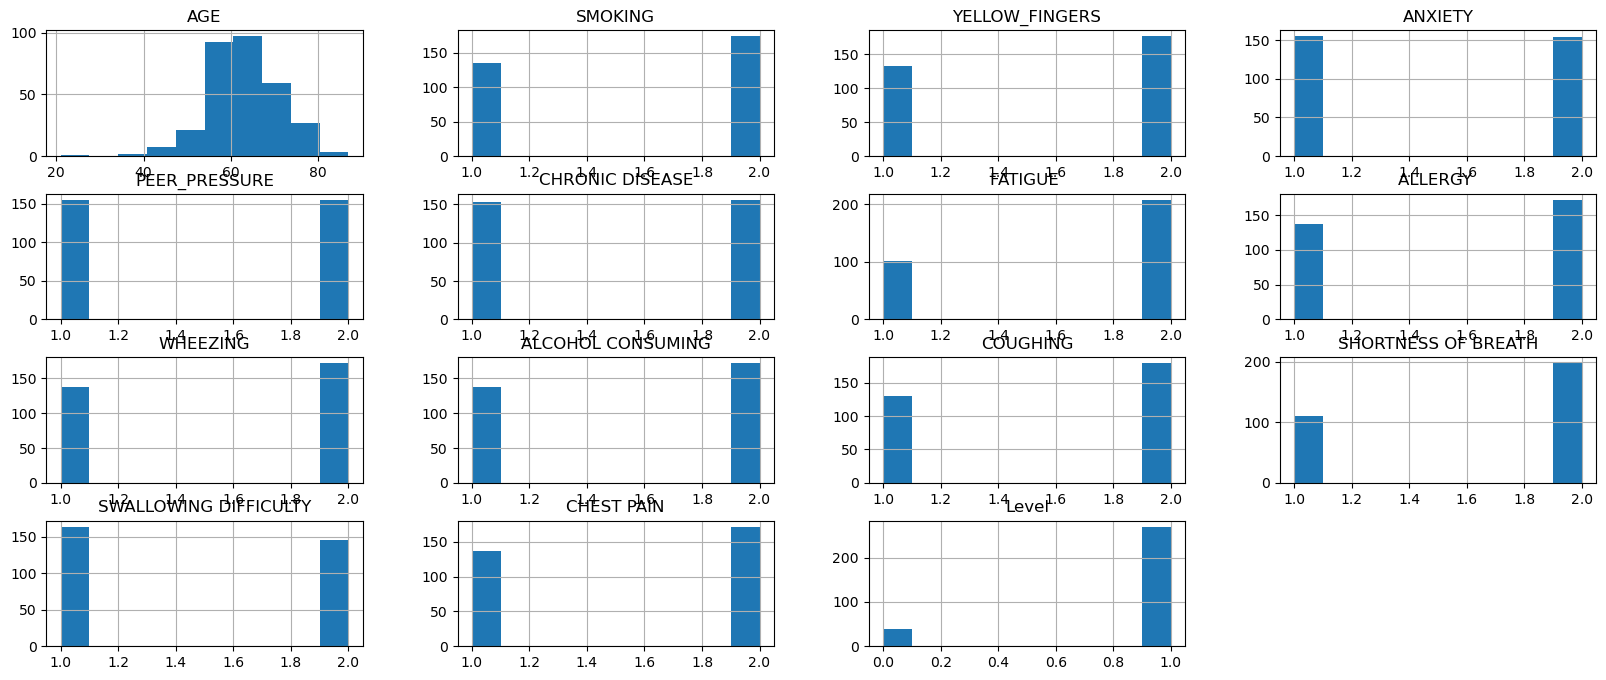

In [51]:
plt.rcParams['figure.figsize'] = (20,8)
df.hist()

In [52]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (247, 14)
Shape of y_train =  (247,)
Shape of X_test =  (62, 14)
Shape of y_test =  (62,)


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
classifier.score(X_test, y_test)

0.7903225806451613

In [57]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
classifier_entropy.score(X_test, y_test)

0.8225806451612904

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [60]:
sc.fit(X_train)

StandardScaler()

In [61]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [62]:
classifier_sc = DecisionTreeClassifier(criterion='gini')
classifier_sc.fit(X_train_sc, y_train)

classifier_sc.score(X_test_sc, y_test)

0.7741935483870968

In [63]:
pred = classifier.predict(X_test)

In [64]:
# importing Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
cm=confusion_matrix(y_test,pred)
cm

array([[ 5,  7],
       [ 6, 44]], dtype=int64)

<AxesSubplot:>

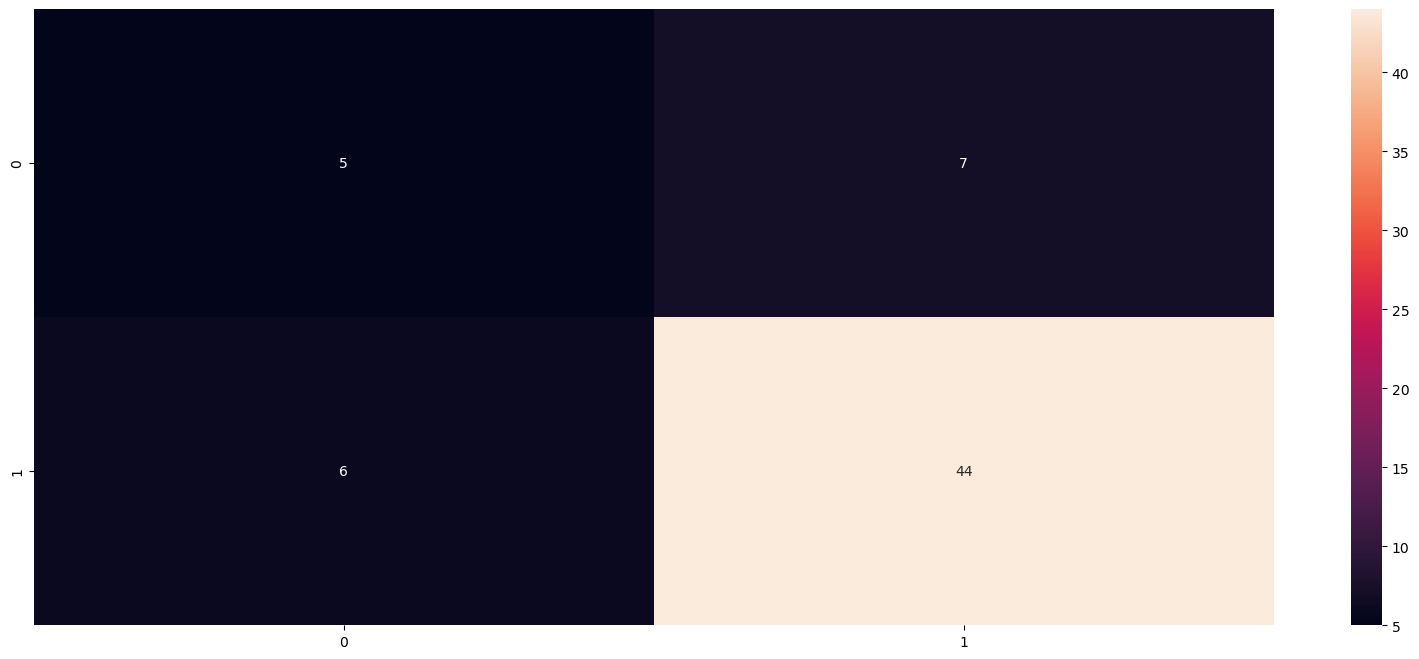

In [66]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.86      0.88      0.87        50

    accuracy                           0.79        62
   macro avg       0.66      0.65      0.65        62
weighted avg       0.78      0.79      0.79        62



In [68]:
patient1 = [40,1,2,140,289,0,0,172,0,1]

In [69]:
patient1 = np.array([patient1])
patient1

array([[ 40,   1,   2, 140, 289,   0,   0, 172,   0,   1]])

In [70]:
if pred[0] == 0:
  print('Patient has no Lung Cancer Attack in Future')
else:
  print('Patient has Lung Cancer Attack in Future')

Patient has Lung Cancer Attack in Future
